### testing C low-level functions for treesignal 
- higher-level python module unfinished, we need to call the private C functions

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sys, subprocess, time, dendropy, os
import numpy as np
from sklearn import manifold, metrics, cluster, neighbors, decomposition, preprocessing
import treesignal

In [2]:
chain_size = 100
sprtreestring = treesignal.__treesignalc.generate_spr_trees(50,chain_size,1)
spr_trees = dendropy.TreeList.get( data=sprtreestring, schema="newick")

In [3]:
feat_matrix = []
for gtree in spr_trees:
    feat_matrix.append(treesignal.__treesignalc.fromtrees(gtree.as_string(schema="newick"),sprtreestring))

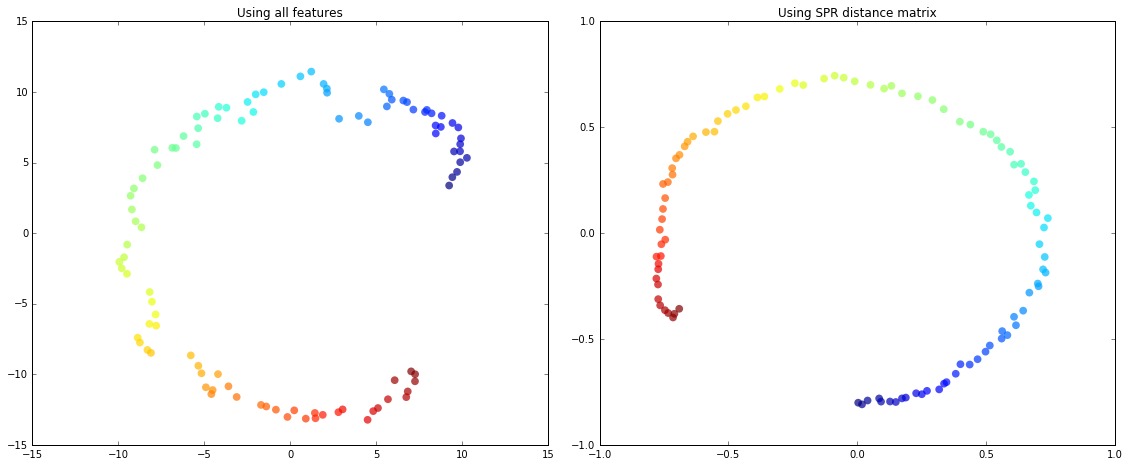

In [4]:
## use all treedistances as features
signal = np.array(feat_matrix)
## use SPR distance matrix (not as a feature)
signalN = signal/signal.mean(0)
dist = signalN[:,3::7] # 3rd element is SPR (4th is "spr residue" btw)
dist = (dist + dist.T)/2  # matrix must be symmetric
fig, axes = plt.subplots(1,2) ; fig.set_size_inches(16, 6)
fig.subplots_adjust(top=.99, bottom=.01, left=.03, right=.97, wspace=.1, hspace=.1)
transf=manifold.MDS(n_components=2).fit_transform(signalN)
axes[0].scatter(transf[:,1], transf[:,0], c=list(range(chain_size+1)), edgecolor="none", alpha=.7, s=60)
axes[0].set_title("Using all features")
transf=manifold.MDS(n_components=2, dissimilarity="precomputed").fit_transform(dist)
axes[1].scatter(transf[:,1], transf[:,0], c=list(range(chain_size+1)), edgecolor="none", alpha=.7, s=60)
axes[1].set_title("Using SPR distance matrix")

/usr/local/lib/python3.5/dist-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


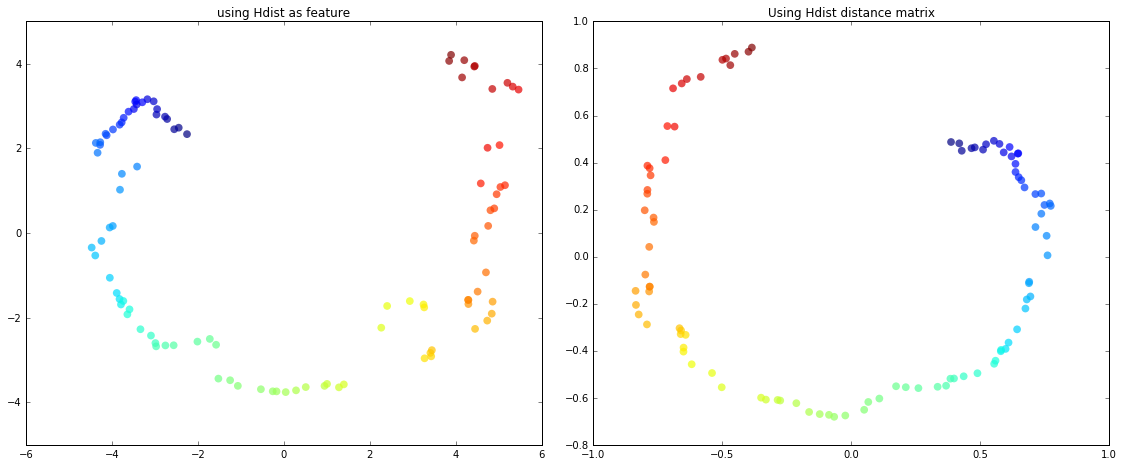

In [5]:
fig, axes = plt.subplots(1,2) ; fig.set_size_inches(16, 6)
fig.subplots_adjust(top=.99, bottom=.01, left=.03, right=.97, wspace=.1, hspace=.1)

dist = signalN[:,6::7] # 3rd element is SPR (4th is "spr residue" btw)
transf=manifold.MDS(n_components=2).fit_transform(dist)
axes[0].scatter(transf[:,1], transf[:,0], c=list(range(chain_size+1)), edgecolor="none", alpha=.7, s=60)
axes[0].set_title("using Hdist as feature")

dist = signalN[:,6::7] # 3rd element is SPR (4th is "spr residue" btw)
dist = (dist + dist.T)/2  # matrix must be symmetric
transf=manifold.MDS(n_components=2, dissimilarity="precomputed").fit_transform(dist)
axes[1].scatter(transf[:,1], transf[:,0], c=list(range(chain_size+1)), edgecolor="none", alpha=.7, s=60)
axes[1].set_title("Using Hdist distance matrix")

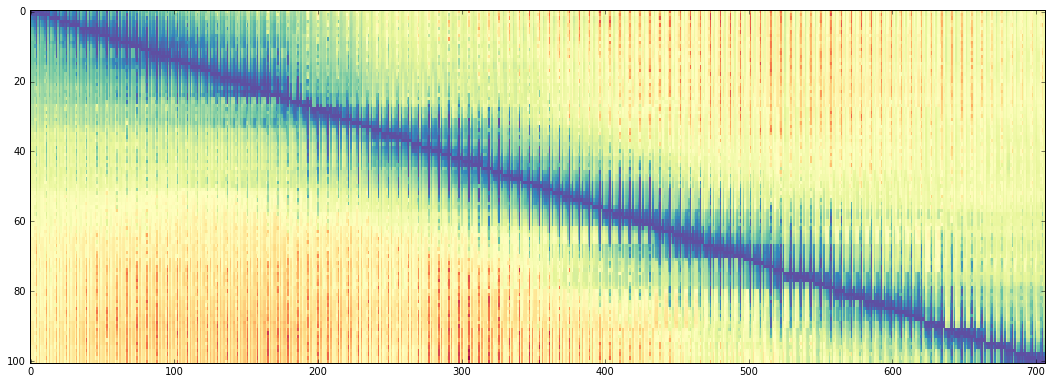

In [6]:
fig, axes = plt.subplots(1) ; fig.set_size_inches(15, 5)
fig.subplots_adjust(top=.99, bottom=.01, left=.03, right=.97, wspace=.1, hspace=.1)
im = axes.imshow(signalN, aspect='auto', cmap="Spectral_r", interpolation="nearest")

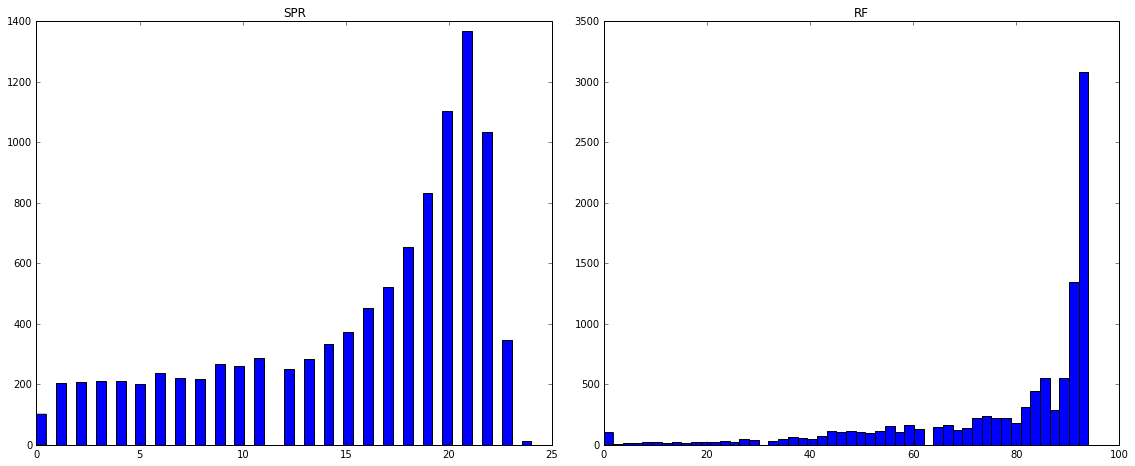

In [10]:
fig, axes = plt.subplots(1,2) ; fig.set_size_inches(16, 6)
fig.subplots_adjust(top=.99, bottom=.01, left=.03, right=.97, wspace=.1, hspace=.1)

dist = signal[:,3::7] # 3rd element is SPR (4th is "spr residue" btw)
axes[0].hist(dist.flatten(),50)
axes[0].set_title("SPR")

dist = signal[:,5::7] # 3rd element is SPR (4th is "spr residue" btw)
axes[1].hist(dist.flatten(),50)
axes[1].set_title("RF")
